In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NN_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,NaN,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,NaN,NaN,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,NaN,0.0,NaN,0.28,0.21,0.07,0.00,NaN,...,0.0,0.0,0.132,NaN,NaN,0.180,0.048,5.114,101.0,NaN
2,0.00,0.00,0.00,0.0,NaN,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,NaN,0.0,0.135,0.000,NaN,NaN,NaN,NaN
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,NaN,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,NaN,54.0
4,0.00,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00,0.64,...,0.0,0.0,0.054,NaN,NaN,0.054,0.000,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.00,0.00,NaN,...,0.0,0.0,0.348,NaN,NaN,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,NaN,0.0,NaN,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,NaN,NaN,0.000,0.000,3.043,15.0,70.0
4594,0.00,NaN,NaN,0.0,0.00,0.00,0.00,0.00,NaN,0.00,...,0.0,NaN,0.136,NaN,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,NaN,0.00,NaN,0.00,NaN,...,0.0,0.0,NaN,NaN,0.065,0.000,NaN,NaN,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	820
float64		column 2	878
float64		column 3	994
float64		column 4	754
float64		column 5	1400
float64		column 6	936
float64		column 7	812
float64		column 8	878
float64		column 9	812
float64		column 10	820
float64		column 11	986
float64		column 12	1342
float64		column 13	1168
float64		column 14	870
float64		column 15	928
float64		column 16	704
float64		column 17	1226
float64		column 18	1102
float64		column 19	754
float64		column 20	870
float64		column 21	1102
float64		column 22	1044
float64		column 23	638
float64		column 24	878
float64		column 25	812
float64		column 26	1168
float64		column 27	812
float64		column 28	638
float64		column 29	1052
float64		column 30	1226
float64		column 31	820
float64		column 32	928
float64		column 33	696
float64		column 34	1160
float64		column 35	936
float64		column 36	1052
float64		column 37	580
float64		column 38	870
float64		column 39	870
float64		column 40	754
float64		column 41	754
float64		column 

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,3777.000000,3719.000000,3603.000000,3843.000000,3197.000000,3661.000000,3785.000000,3719.000000,3785.000000,3777.000000,...,3669.000000,3777.000000,3429.000000,3429.000000,3611.000000,3777.000000,3719.000000,3719.000000,3603.000000,3901.000000
mean,0.087858,0.178927,0.257064,0.077754,0.262362,0.081579,0.100330,0.088037,0.077609,0.222049,...,0.025898,0.034272,0.125044,0.013127,0.248844,0.070044,0.041332,5.170116,46.915348,268.355037
std,0.269289,1.158277,0.466201,1.526114,0.570098,0.256189,0.376503,0.340377,0.251456,0.636758,...,0.253276,0.227068,0.189153,0.102207,0.839383,0.233730,0.443194,33.179641,199.144981,577.505858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.068000,0.000000,0.000000,0.000000,0.000000,2.287000,15.000000,95.000000
75%,0.000000,0.000000,0.380000,0.000000,0.340000,0.000000,0.000000,0.000000,0.000000,0.110000,...,0.000000,0.000000,0.178000,0.000000,0.282500,0.044000,0.000000,3.666000,42.000000,260.000000
max,4.340000,14.280000,5.100000,42.810000,8.330000,5.880000,7.270000,5.880000,3.330000,18.180000,...,10.000000,4.367000,2.941000,4.081000,32.478000,5.300000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

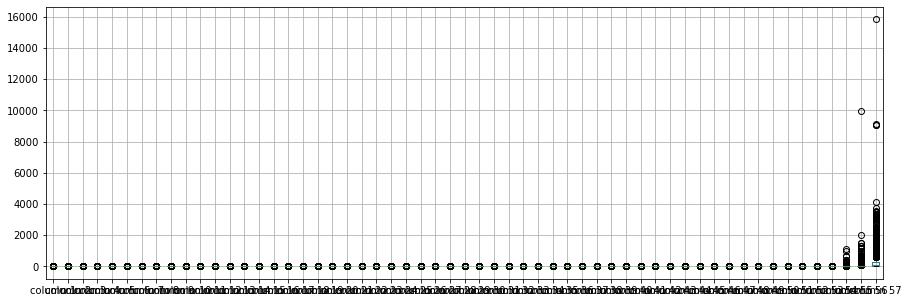

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.087858
column 2       0.178927
column 3       0.257064
column 4       0.077754
column 5       0.262362
column 6       0.081579
column 7       0.100330
column 8       0.088037
column 9       0.077609
column 10      0.222049
column 11      0.052174
column 12      0.476283
column 13      0.075553
column 14      0.052949
column 15      0.042995
column 16      0.237490
column 17      0.113150
column 18      0.158644
column 19      1.615943
column 20      0.078793
column 21      0.739342
column 22      0.075027
column 23      0.090306
column 24      0.080707
column 25      0.525601
column 26      0.223724
column 27      0.705501
column 28      0.110591
column 29      0.075255
column 30      0.085835
column 31      0.055038
column 32      0.041142
column 33      0.083250
column 34      0.033282
column 35      0.099637
column 36      0.085337
column 37      0.125447
column 38      0.013204
column 39      0.066866
column 40      0.058186
column 41      0.038933
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.022829,0.053575,0.010222,0.028312,0.058413,0.018489,-0.001462,0.093851,0.023183,...,-0.020986,-0.018935,-0.010545,-0.023527,0.024142,0.151457,-0.010191,0.052407,0.044967,0.100114
column 2,-0.022829,1.000000,-0.023229,-0.007264,-0.022290,-0.020508,0.008448,-0.013011,0.003254,0.009535,...,-0.012511,-0.004948,-0.046859,-0.015451,-0.010798,-0.005352,0.004567,0.005649,-0.000074,-0.015188
column 3,0.053575,-0.023229,1.000000,-0.023691,0.140406,0.091959,0.042206,0.013834,0.098011,0.024433,...,-0.020862,-0.032099,-0.023947,-0.031145,0.136683,0.093110,0.000348,0.095620,0.082859,0.091295
column 4,0.010222,-0.007264,-0.023691,1.000000,-0.010290,-0.002058,0.027836,0.015141,0.000886,-0.003275,...,0.000977,0.000383,-0.017083,-0.005618,-0.003722,0.007709,0.001521,0.002255,0.045586,0.023811
column 5,0.028312,-0.022290,0.140406,-0.010290,1.000000,0.077869,0.127931,0.044023,0.060553,0.051258,...,-0.032117,-0.022283,-0.014714,-0.013572,0.031205,0.056876,-0.002754,0.055562,0.095311,0.027618
column 6,0.058413,-0.020508,0.091959,-0.002058,0.077869,1.000000,0.036048,0.081013,0.098602,0.003380,...,-0.026398,-0.013604,-0.015007,-0.024136,0.045648,0.072910,0.040133,-0.008909,0.042927,0.077556
column 7,0.018489,0.008448,0.042206,0.027836,0.127931,0.036048,1.000000,0.039496,0.032491,0.040081,...,-0.029553,-0.032899,-0.059785,-0.018856,0.043818,0.072421,0.045782,0.020141,0.040204,-0.005147
column 8,-0.001462,-0.013011,0.013834,0.015141,0.044023,0.081013,0.039496,1.000000,0.111316,0.067188,...,-0.016489,-0.023496,-0.039334,-0.013428,0.025374,0.057444,-0.004472,-0.005295,0.019113,0.048268
column 9,0.093851,0.003254,0.098011,0.000886,0.060553,0.098602,0.032491,0.111316,1.000000,0.104343,...,-0.022856,-0.011030,-0.012113,0.030355,0.032540,0.133410,0.002741,0.108317,0.123904,0.296651
column 10,0.023183,0.009535,0.024433,-0.003275,0.051258,0.003380,0.040081,0.067188,0.104343,1.000000,...,-0.017251,0.001050,0.020894,0.000744,0.019822,0.047383,0.019933,0.073247,0.060366,0.071564


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+18,17+18+18,17+18+18+18,17+18+18,17+18,17], vae_layer = False, seed = 180)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 517.7879346787722
Epoch: 1 , loss: 520.2691840992572
Epoch: 2 , loss: 516.1993531017769
Epoch: 3 , loss: 517.3557679977151
Epoch: 4 , loss: 511.21835061315875
Epoch: 5 , loss: 517.3531331451097
Epoch: 6 , loss: 518.256733007132
Epoch: 7 , loss: 521.551495409178
Epoch: 8 , loss: 513.5359632910752
Epoch: 9 , loss: 512.7929661980074
Epoch: 10 , loss: 513.6870517531338
Epoch: 11 , loss: 509.699906352505
Epoch: 12 , loss: 506.5553087506975
Epoch: 13 , loss: 472.2977782192961
Epoch: 14 , loss: 427.8830083122652
Epoch: 15 , loss: 404.2636816576383
Epoch: 16 , loss: 401.7681237729169
Epoch: 17 , loss: 404.2406675624515
Epoch: 18 , loss: 394.4022725068734
Epoch: 19 , loss: 390.0644349154695
Epoch: 20 , loss: 397.3194374988303
Epoch: 21 , loss: 382.9271871719626
Epoch: 22 , loss: 382.39301600439626
Epoch: 23 , loss: 398.827774818766
Epoch: 24 , loss: 393.1012684626031
Epoch: 25 , loss: 399.5073819708741
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.150522
column 6      0.040108
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.043811
column 14     0.000000
column 15     0.008452
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20    -0.010522
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.102840
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.000000,-0.462998,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.134824,0.014342,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,-0.267521,0.000000,0.056923,0.000000,0.0,0.000000,0.000000,-0.823938,...,0.0,0.000000,0.000000,0.000010,-0.221922,0.0,0.000000,0.000000,0.000000,-966.244389
2,0.0,0.000000,0.000000,0.000000,-0.384888,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.038110,0.000000,0.000000,0.0,0.019577,-0.514206,-29.924012,-151.600304
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.810485,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7.667410,0.000000
4,0.0,0.000000,0.000000,-0.006782,-1.771767,0.000000,0.0,0.044784,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000407,-0.059445,0.0,0.000000,0.108041,0.000000,-96.664067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.000000,-0.533697,0.000000,0.000000,0.087826,0.0,0.000000,0.000000,-0.063261,...,0.0,0.000000,0.000000,-0.024395,-0.923026,0.0,0.000000,0.000000,0.000000,0.000000
4593,0.0,0.000000,0.144866,0.000000,0.154551,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.001517,0.123241,0.0,0.000000,0.000000,0.000000,0.000000
4594,0.0,0.049308,0.246008,0.000000,0.000000,0.000000,0.0,0.000000,0.051324,0.000000,...,0.0,0.046592,0.000000,0.010084,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4595,0.0,0.000000,0.000000,0.000000,0.000000,-0.303417,0.0,0.083743,0.000000,0.126039,...,0.0,0.000000,0.132609,0.001400,0.000000,0.0,-0.007099,1.461499,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

20538.425941285546

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.4327646138985278

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.351923
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.361400
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      1.331709
column 26      0.248790
column 27      0.169531
column 28      0.000000
column 29      0.000000
column 30     -0.133904
column 31      0.000000
column 32      0.069777
column 33      0.000000
column 34      0.000000
column 35     -0.181080
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.640000,0.177002,0.000000,0.320000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.134824,0.014342,0.000000,0.778000,0.000,0.000000,3.756000,61.000000,278.000000
1,0.21,0.280000,0.232479,0.000000,0.196923,0.280000,0.21,0.070000,0.000000,0.116062,...,0.0,0.000000,0.132000,0.000010,0.150078,0.180,0.048000,5.114000,101.000000,61.755611
2,0.00,0.000000,0.000000,0.000000,0.245112,0.000000,0.31,0.630000,0.310000,0.630000,...,0.0,0.000000,0.096890,0.000000,0.135000,0.000,0.019577,3.022794,10.075988,39.399696
3,0.00,0.000000,0.000000,0.000000,1.850000,0.000000,0.00,0.039515,0.000000,0.000000,...,0.0,0.000000,0.223000,0.000000,0.000000,0.000,0.000000,3.000000,7.332590,54.000000
4,0.00,0.000000,0.000000,-0.006782,0.148233,0.000000,0.00,0.044784,0.000000,0.640000,...,0.0,0.000000,0.054000,0.000407,0.104555,0.054,0.000000,1.779041,4.000000,15.335933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.000000,0.106303,0.000000,0.000000,0.087826,0.00,0.000000,0.000000,-0.063261,...,0.0,0.000000,0.348000,-0.024395,0.236974,0.000,0.000000,3.121000,15.000000,103.000000
4593,0.00,0.000000,0.144866,0.000000,0.154551,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.001517,0.123241,0.000,0.000000,3.043000,15.000000,70.000000
4594,0.00,0.049308,0.246008,0.000000,0.000000,0.000000,0.00,0.000000,0.051324,0.000000,...,0.0,0.046592,0.136000,0.010084,0.000000,0.000,0.409000,1.837000,12.000000,68.000000
4595,0.17,0.000000,0.680000,0.000000,0.340000,0.036583,0.00,0.083743,0.000000,0.126039,...,0.0,0.000000,0.164609,0.001400,0.065000,0.000,-0.007099,2.650499,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_NN_20(imp).xlsx", index=False, header=False)